# Alex's Personal Notebook

Details will go here eventually.

To Do:
- 7/25 - 7/26: Clean data individually
- 7/25 - 7/26: Clean data with team
- 7/25 - 7/26: Explore data
- 7/26:        Define business questions
- 7/26:        Start analysis
- ...
- 7/31:        Finalize project
- 8/01:        Polish and present with team
- 8/02:        Present to Deloitte

## Starting exploration

**Importing the Data**

The data files were compressed and stored in different formats. The first step, then, is to decompress them and determine how to parse their structures.

- bom.movie_gross.csv.gz
- im.db.zip
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz       <-- This one is encoded with ANSI
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

Using pandas, we should be able to read the zipped files directly into dataframes.

In [1]:
# imports
import numpy as np
import pandas as pd
import sqlite3
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read the files into dataframes

movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# create temporary SQL database from im.db.zip

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as z:
    z.printdir()
    imdb_data = z.extractall()

# open SQL link to im.db

conn = sqlite3.connect('im.db')

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328


## Basic info on the imported data

In [3]:
# exploring movie_gross

movie_gross.head()

# title	studio	domestic_gross	foreign_gross	year
# 0	Toy Story 3	BV	415000000.0	652000000	2010
# 1	Alice in Wonderland (2010)	BV	334200000.0	691300000	2010
# 2	Harry Potter and the Deathly Hallows Part 1	WB	296000000.0	664300000	2010
# 3	Inception	WB	292600000.0	535700000	2010
# 4	Shrek Forever After	P/DW	238700000.0	513900000	2010

movie_gross.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3387 entries, 0 to 3386
# Data columns (total 5 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   title           3387 non-null   object 
#  1   studio          3382 non-null   object 
#  2   domestic_gross  3359 non-null   float64
#  3   foreign_gross   2037 non-null   object 
#  4   year            3387 non-null   int64  
# dtypes: float64(1), int64(1), object(3)
# memory usage: 132.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
movie_info.head()

# id	synopsis	rating	genre	director	writer	theater_date	dvd_date	currency	box_office	runtime	studio
# 0	1	This gritty, fast-paced, and innovative police...	R	Action and Adventure|Classics|Drama	William Friedkin	Ernest Tidyman	Oct 9, 1971	Sep 25, 2001	NaN	NaN	104 minutes	NaN
# 1	3	New York City, not-too-distant-future: Eric Pa...	R	Drama|Science Fiction and Fantasy	David Cronenberg	David Cronenberg|Don DeLillo	Aug 17, 2012	Jan 1, 2013	$	600,000	108 minutes	Entertainment One
# 2	5	Illeana Douglas delivers a superb performance ...	R	Drama|Musical and Performing Arts	Allison Anders	Allison Anders	Sep 13, 1996	Apr 18, 2000	NaN	NaN	116 minutes	NaN
# 3	6	Michael Douglas runs afoul of a treacherous su...	R	Drama|Mystery and Suspense	Barry Levinson	Paul Attanasio|Michael Crichton	Dec 9, 1994	Aug 27, 1997	NaN	NaN	128 minutes	NaN
# 4	7	NaN	NR	Drama|Romance	Rodney Bennett	Giles Cooper	NaN	NaN	NaN	NaN	200 minutes	NaN

movie_info.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1560 entries, 0 to 1559
# Data columns (total 12 columns):
#  #   Column        Non-Null Count  Dtype 
# ---  ------        --------------  ----- 
#  0   id            1560 non-null   int64 
#  1   synopsis      1498 non-null   object
#  2   rating        1557 non-null   object
#  3   genre         1552 non-null   object
#  4   director      1361 non-null   object
#  5   writer        1111 non-null   object
#  6   theater_date  1201 non-null   object
#  7   dvd_date      1201 non-null   object
#  8   currency      340 non-null    object
#  9   box_office    340 non-null    object
#  10  runtime       1530 non-null   object
#  11  studio        494 non-null    object
# dtypes: int64(1), object(11)
# memory usage: 146.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
reviews.head()

# 	id	review	rating	fresh	critic	top_critic	publisher	date
# 0	3	A distinctly gallows take on contemporary fina...	3/5	fresh	PJ Nabarro	0	Patrick Nabarro	November 10, 2018
# 1	3	It's an allegory in search of a meaning that n...	NaN	rotten	Annalee Newitz	0	io9.com	May 23, 2018
# 2	3	... life lived in a bubble in financial dealin...	NaN	fresh	Sean Axmaker	0	Stream on Demand	January 4, 2018
# 3	3	Continuing along a line introduced in last yea...	NaN	fresh	Daniel Kasman	0	MUBI	November 16, 2017
# 4	3	... a perverse twist on neorealism...	NaN	fresh	NaN	0	Cinema Scope	October 12, 2017

reviews.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 54432 entries, 0 to 54431
# Data columns (total 8 columns):
#  #   Column      Non-Null Count  Dtype 
# ---  ------      --------------  ----- 
#  0   id          54432 non-null  int64 
#  1   review      48869 non-null  object
#  2   rating      40915 non-null  object
#  3   fresh       54432 non-null  object
#  4   critic      51710 non-null  object
#  5   top_critic  54432 non-null  int64 
#  6   publisher   54123 non-null  object
#  7   date        54432 non-null  object
# dtypes: int64(2), object(6)
# memory usage: 3.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [6]:
movies.head()

# Unnamed: 0	genre_ids	id	original_language	original_title	popularity	release_date	title	vote_average	vote_count
# 0	0	[12, 14, 10751]	12444	en	Harry Potter and the Deathly Hallows: Part 1	33.533	2010-11-19	Harry Potter and the Deathly Hallows: Part 1	7.7	10788
# 1	1	[14, 12, 16, 10751]	10191	en	How to Train Your Dragon	28.734	2010-03-26	How to Train Your Dragon	7.7	7610
# 2	2	[12, 28, 878]	10138	en	Iron Man 2	28.515	2010-05-07	Iron Man 2	6.8	12368
# 3	3	[16, 35, 10751]	862	en	Toy Story	28.005	1995-11-22	Toy Story	7.9	10174
# 4	4	[28, 878, 12]	27205	en	Inception	27.920	2010-07-16	Inception	8.3	22186

movies.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 26517 entries, 0 to 26516
# Data columns (total 10 columns):
#  #   Column             Non-Null Count  Dtype  
# ---  ------             --------------  -----  
#  0   Unnamed: 0         26517 non-null  int64  
#  1   genre_ids          26517 non-null  object 
#  2   id                 26517 non-null  int64  
#  3   original_language  26517 non-null  object 
#  4   original_title     26517 non-null  object 
#  5   popularity         26517 non-null  float64
#  6   release_date       26517 non-null  object 
#  7   title              26517 non-null  object 
#  8   vote_average       26517 non-null  float64
#  9   vote_count         26517 non-null  int64  
# dtypes: float64(2), int64(3), object(5)
# memory usage: 2.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
movie_budgets.head()

# 	id	release_date	movie	production_budget	domestic_gross	worldwide_gross
# 0	1	Dec 18, 2009	Avatar	$425,000,000	$760,507,625	$2,776,345,279
# 1	2	May 20, 2011	Pirates of the Caribbean: On Stranger Tides	$410,600,000	$241,063,875	$1,045,663,875
# 2	3	Jun 7, 2019	Dark Phoenix	$350,000,000	$42,762,350	$149,762,350
# 3	4	May 1, 2015	Avengers: Age of Ultron	$330,600,000	$459,005,868	$1,403,013,963
# 4	5	Dec 15, 2017	Star Wars Ep. VIII: The Last Jedi	$317,000,000	$620,181,382	$1,316,721,747

movie_budgets.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 5782 entries, 0 to 5781
# Data columns (total 6 columns):
#  #   Column             Non-Null Count  Dtype 
# ---  ------             --------------  ----- 
#  0   id                 5782 non-null   int64 
#  1   release_date       5782 non-null   object
#  2   movie              5782 non-null   object
#  3   production_budget  5782 non-null   object
#  4   domestic_gross     5782 non-null   object
#  5   worldwide_gross    5782 non-null   object
# dtypes: int64(1), object(5)
# memory usage: 271.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# explore im.db

pd.read_sql("""
    SELECT name
      FROM 'sqlite_master'
     WHERE type = 'table'
  ;
""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# Exploration Keynotes and Cleaning

### movie_gross

This csv imported with 3387 rows. The 5 columns are title, studio, domestic_gross, foreign_gross, and year. Of these, only title and year were complete. studio and domestic_gross were effectively complete (only having a few null values), but foreign_gross was missing from > 1/3 of the rows. The data spans the years of 2010-2018.

Foreign_gross was initially formatted as string objects, but was recast as floats. The question remains what to do with the NaN values, though.

The values for domestic_gross taper off towards the end each year, implying that the data is pre-sorted by domestic_gross. This is also true of foreign_gross, giving the frame an internal two-level sort on domestic_gross and foreign_gross descending.

There are many missing values in the foreign_gross column and some in the domestic_gross column. It is unclear if these represent a lack of data or the fact that the movie did not make any money in that market. Since there are no values of 0 in either column, it is likely a lack of revenue and is therefore significant. The most reasonable course of action, then, might be to replace the NaN values in those columns with 0's.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 3387 entries, 0 to 3386
    Data columns (total 5 columns):
    . #   Column          Non-Null Count  Dtype  
    ---  ------          --------------  -----  
     0   title           3387 non-null   object 
     1   studio          3382 non-null   object 
     2   domestic_gross  3359 non-null   float64
     3   foreign_gross   2037 non-null   object 
     4   year            3387 non-null   int64  
    dtypes: float64(1), int64(1), object(3)
    memory usage: 132.4+ KB

In [9]:
# cleaning movie_gross

# convert foreign_gross from strings to floats
movie_gross["foreign_gross"] = movie_gross.foreign_gross.str.replace(",", "").astype('float')

# handle NaN values in foreign_gross and domestic_gross by replacing NaN with 0
## many of the NaN's may have actual monetary values that were not included in the database
movie_gross["domestic_gross"].fillna(0, inplace=True)
movie_gross["foreign_gross"].fillna(0, inplace=True)

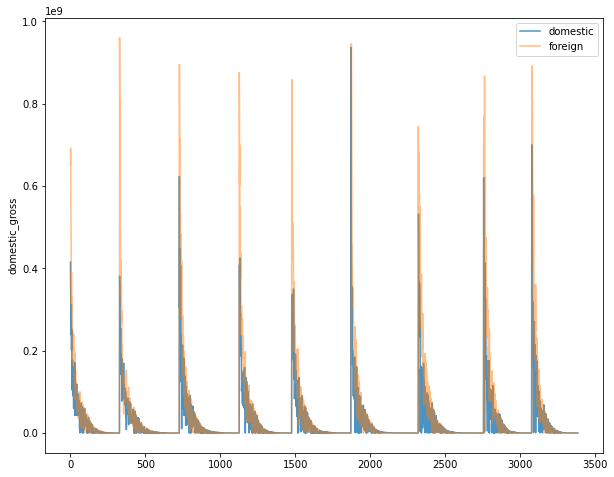

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=movie_gross.index, y=movie_gross["domestic_gross"], alpha=0.8, ax=ax, label='domestic')
sns.lineplot(x=movie_gross.index, y=movie_gross["foreign_gross"], 
             alpha=0.5, ax=ax, label='foreign');

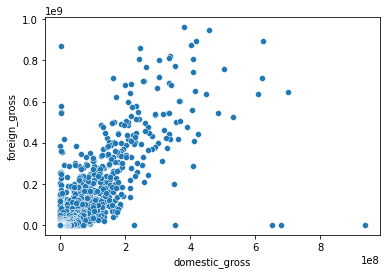

In [11]:
sns.scatterplot(x=movie_gross["domestic_gross"], y=movie_gross["foreign_gross"]);

### movie_info

This tsv imported with 1560 rows. The 12 columns are id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio. Several of the columns have significant amounts of missing values, including currency, box_office, and studio. Since none of these three carried a significant amount of information, these columns were dropped.

Ratings were strings in the set ['G', 'PG', 'PG-13', 'R', 'NC17', 'NR'].
Genre included all applicable genres and was pipe-separated (i.e. 'Comedy|Drama')
All runtimes are given in minutes.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1560 entries, 0 to 1559
    Data columns (total 12 columns):
    . #   Column        Non-Null Count  Dtype 
    ---  ------        --------------  ----- 
     0   id            1560 non-null   int64 
     1   synopsis      1498 non-null   object
     2   rating        1557 non-null   object
     3   genre         1552 non-null   object
     4   director      1361 non-null   object
     5   writer        1111 non-null   object
     6   theater_date  1201 non-null   object
     7   dvd_date      1201 non-null   object
     8   currency      340 non-null    object
     9   box_office    340 non-null    object
     10  runtime       1530 non-null   object
     11  studio        494 non-null    object
    dtypes: int64(1), object(11)
    memory usage: 146.4+ KB

In [12]:
# movie_info.head()
# examining the units for all time values
np.unique([tim.split()[1] for tim in movie_info[movie_info['runtime'].notna()]['runtime']])

array(['minutes'], dtype='<U7')

In [13]:
# clean movie_info

# drop currency, box_office, and studio
try:
    movie_info.drop(columns=["currency", "box_office", "studio"], inplace=True)
except:
    ;

# transform theater_date and dvd_date from strings to datetime objects.
movie_info["theater_date"] = pd.to_datetime(movie_info["theater_date"])
movie_info["dvd_date"] = pd.to_datetime(movie_info["dvd_date"])

# change runtimes from string to float
movie_info["runtime"] = movie_info["runtime"].str.replace(" minutes", "").astype("float64")

### reviews

This tsv imported with 54432 rows. The 8 columns are id, review, rating, fresh, critic, top_critic, publisher, and date. IDs range from 1 to 2000. Reviews are strings. Rating is a mess, with no standard format or denominator. Fresh is either "fresh" or "rotten". Critic is a string critic's name. Top_critic is [0, 1], probably representing whether the critic is rated as a top critic. Publisher is a string publisher name. Date is a string representing review date in the form of 'month day, year' (ex. 'April 1, 1993').


    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 54432 entries, 0 to 54431
    Data columns (total 8 columns):
     #   Column      Non-Null Count  Dtype 
    ---  ------      --------------  ----- 
     0   id          54432 non-null  int64 
     1   review      48869 non-null  object
     2   rating      40915 non-null  object
     3   fresh       54432 non-null  object
     4   critic      51710 non-null  object
     5   top_critic  54432 non-null  int64 
     6   publisher   54123 non-null  object
     7   date        54432 non-null  object
    dtypes: int64(2), object(6)
    memory usage: 3.3+ MB

In [14]:
# clean reviews

# standardize ratings


# chage fresh to a boolean column
## this may not be necessry
# reviews["is_fresh"] = (reviews["fresh"] == "fresh")

# change date to datetime
reviews["date"] = pd.to_datetime(reviews["date"])

## is it worth standardizing ratings by critic?

### movies

This csv imported with 26517 rows. The 10 columns are 'Unnamed: 0', genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, and vote_count. 'Unnamed: 0' is identical to the index of the frame and was likely used as the index in its prior format. It can be safely dropped. Genre_ids contains list of the genre ids of the movie, repesented by the table below. ID is uncertain, but ranges from 27 to 609444. Original_language is from the set:

   ['ab', 'af', 'ar', 'bg', 'bn', 'bo', 'bs', 'ca', 'cn', 'cr', 'cs',
   'cy', 'da', 'de', 'dz', 'el', 'en', 'es', 'et', 'eu', 'fa', 'fi',
   'fr', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'hz', 'id', 'is',
   'it', 'ja', 'ka', 'kk', 'kn', 'ko', 'ku', 'ky', 'lo', 'lt', 'lv',
   'mi', 'ml', 'mr', 'nb', 'ne', 'nl', 'no', 'pa', 'pl', 'ps', 'pt',
   'ro', 'ru', 'si', 'sl', 'sn', 'sq', 'sr', 'sv', 'sw', 'ta', 'te',
   'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'xh', 'xx', 'yi', 'zh']

Original_title seems to be the title under which the movie was first released. This is in contrast to title, which is th English translation or re-titling. For correlation within this study, title should be preferred over original title. Popularity is unclear in its meaning, but may represent a % of people who liked it, since the values in the column range from 0.6 to 80.773. Release_date is a string date in the form of yyyy-mm-dd and ranges from 1930 - 2020. Vote-average is a float that ranges from 0.0 to 10.0, suggesting a 10-point scale. Vote_count is an integer ranging from 1 - 22186.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 26517 entries, 0 to 26516
    Data columns (total 10 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Unnamed: 0         26517 non-null  int64  
     1   genre_ids          26517 non-null  object 
     2   id                 26517 non-null  int64  
     3   original_language  26517 non-null  object 
     4   original_title     26517 non-null  object 
     5   popularity         26517 non-null  float64
     6   release_date       26517 non-null  object 
     7   title              26517 non-null  object 
     8   vote_average       26517 non-null  float64
     9   vote_count         26517 non-null  int64  
    dtypes: float64(2), int64(3), object(5)
    memory usage: 2.0+ MB
    
    GENRE ID
- Action          28
- Adventure       12
- Animation       16
- Comedy          35
- Crime           80
- Documentary     99
- Drama           18
- Family          10751
- Fantasy         14
- History         36
- Horror          27
- Music           10402
- Mystery         9648
- Romance         10749
- Science Fiction 878
- TV Movie        10770
- Thriller        53
- War             10752
- Western         37

In [15]:
# clean movies

# drop 'Unnamed: 0'
movies.drop(columns="Unnamed: 0", inplace=True)

# drop id since there is no correlation with other tables
movies.drop(columns="id", inplace=True)

# drop original_title (unless we want to come back for this later)
movies.drop(columns="original_title", inplace=True)

# make release_date a datetime object
movies["release_date"] = pd.to_datetime(movies["release_date"])

In [16]:
movies.head(10)

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",en,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",en,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",en,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",en,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",en,22.855,2010-11-04,Megamind,6.8,3635


### movie budgets

This csv imported with 5782 rows. The 6 columns are id, release_date, movie, production_budget, domestic_gross, and worldwide_gross. ID is an integer in the range of 1 - 100, with no imediate correlation inside or outside of the table. Release date is a string object in the form of 'Mon. day, year'. Production budget is a string representing the dollar amount of the budget. 

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5782 entries, 0 to 5781
    Data columns (total 6 columns):
     #   Column             Non-Null Count  Dtype 
    ---  ------             --------------  ----- 
     0   id                 5782 non-null   int64 
     1   release_date       5782 non-null   object
     2   movie              5782 non-null   object
     3   production_budget  5782 non-null   object
     4   domestic_gross     5782 non-null   object
     5   worldwide_gross    5782 non-null   object
    dtypes: int64(1), object(5)
    memory usage: 271.2+ KB

In [36]:
# cleaning movie_budgets

# drop id
movie_budgets.drop(columns="id")

# cnahge release_date to a datetime
movie_budgets["release_date"] = pd.to_datetime(movie_budgets["release_date"])

# change production_budget, domestic_gross, and worldwide_gross to float dollar amounts (int was too small)
movie_budgets[["production_budget", "domestic_gross", "worldwide_gross"]] = \
                        movie_budgets[["production_budget", "domestic_gross", "worldwide_gross"]]\
                        .apply(lambda x: (x.replace('[\$,]', '', regex=True).astype(float)))

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### im.db

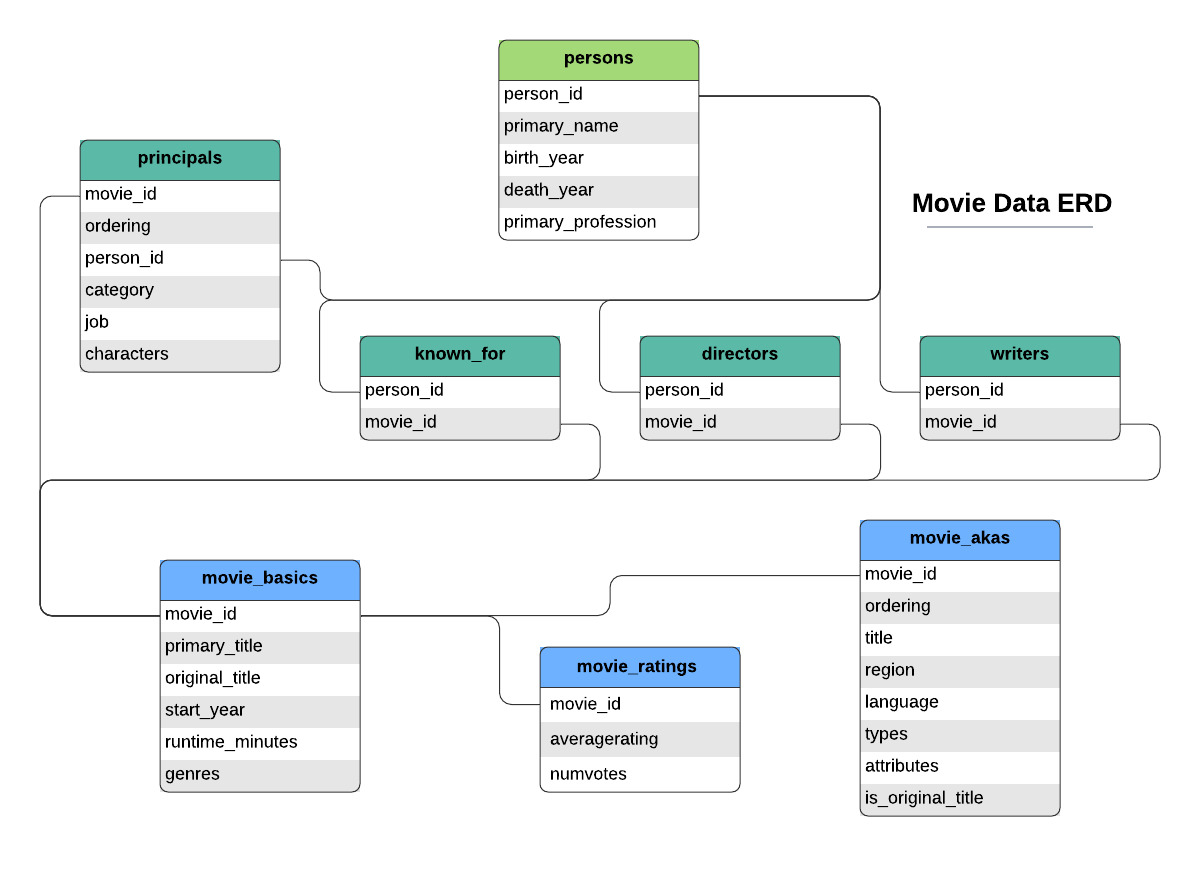

Exploring the im.db file is a more comprehensive task, due to its relational structure. It seems like there are two primary keys which link every table: person_id and movie_id.

Table Details:

    persons (n = 606648)
    	person_id	primary_name	   birth_year	death_year	    primary_profession
    0	nm0061671	Mary Ellen Bauder	NaN	           None	        miscellaneous,production_manager,producer
    
    principals (n = 1028186)
    	movie_id	ordering	person_id	category	job	    characters
    0	tt0111414	   1	     nm0246005	  actor     None	["The Man"]
    
    known_for (n = 1638260)
        person_id	movie_id
    0	nm0061671	tt0837562
    
    directors (n = 291174)
        movie_id	person_id
    0	tt0285252	nm0899854
    
    writers (n = 255873)
        movie_id	person_id
    0	tt0285252	nm0899854
    
    movie_basics (n = 146144)
        movie_id	primary_title	original_title	start_year	runtime_minutes	  genres
    0	tt0063540	Sunghursh	       Sunghursh	  2013	         175.0	      Action,Crime,Drama
    
    movie_ratings (n = 73856)
    	movie_id	averagerating	numvotes
    0	tt10356526	 8.3	         31
    
    movie_akas (n = 331703)
        movie_id	ordering	title	      region	language	types	attributes	is_original_title
    0	tt0369610	10	       Джурасик свят	BG	      bg	    None	None	     0.0

In [61]:
# persons, principals, known_for, directors, writers, movie_basics, movie_ratings, movie_akas

parms = {'tabl': 'persons'
         ,'group': 'primary_name'}

q = \
"""
    SELECT *
      FROM ?
 ;
"""

q2 = \
"""
    SELECT a.*
      FROM persons a
      JOIN (SELECT primary_name, COUNT(*)
              FROM persons 
          GROUP BY primary_name
            HAVING count(*) > 1 ) b
        ON a.primary_name = b.primary_name
  ORDER BY a.primary_name
 ;
"""

pd.read_sql(q, conn, params=['persons'])

DatabaseError: Execution failed on sql '
    SELECT *
      FROM ?
 ;
': near "?": syntax error

In [19]:
# exploring for ways to link our dataframes

# movie_gross.title
# movies["id"]         # id from 27 to 609444
# movie_info.id        # id from 1 to 2000
# movie_budgets.movie  # id from 1 to 100; link on movie = title instead
# reviews.id           # id from 3 to 2000
# pd.merge(movie_info, reviews, on=["id"])

In [20]:
### Testing Cell ###

